<a href="https://colab.research.google.com/github/vshantam/Blindness_Detection/blob/master/Blindness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
! pip install kaggle torchvision torch pandas matplotlib numpy scipy scikit-learn

In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!ls -a /content/.kaggle

ls: cannot access '/content/.kaggle': No such file or directory


In [0]:
import json
token = {"username":"vshantam","key":"eb95b0b5d2917ce87b64a974b036c9bd"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)
file.close()

In [14]:
!ls -a

.  ..  .config	kaggle.json  sample_data


In [0]:
!cp /content/kaggle.json  ~/.kaggle/kaggle.json

In [14]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets list

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                      2MB  2019-08-12 16:24:45           2443  
lakshyaag/india-trade-data                                India - Trade Data                                  1MB  2019-08-16 16:13:58           2106  
AnalyzeBoston/crimes-in-boston                            Crimes in Boston                                   10MB  2018-09-04 17:56:03          13908  
jolasa/waves-measuring-buoys-data-mooloolaba              Waves Measuring Buoys Data                        599KB  2019-07-07 16:59:44           1549  
citizen-ds-ghana/health-facilities-gh                     Ghana Health Facilities       

In [17]:
!kaggle competitions download -c aptos2019-blindness-detection -p /content

100% 8.00G/8.01G [04:06<00:00, 97.9MB/s]
100% 8.01G/8.01G [04:06<00:00, 34.8MB/s]
 99% 1.49G/1.50G [00:51<00:00, 40.3MB/s]
100% 1.50G/1.50G [00:51<00:00, 31.2MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 50.6MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 24.7MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 57.0MB/s]


In [0]:
!df -h 

Filesystem      Size  Used Avail Use% Mounted on
overlay          49G   26G   22G  55% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1        55G   33G   23G  59% /etc/hosts
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
!mkdir Train_Images Test_Images

In [19]:
!unzip train_images.zip  -d Train_Images

Archive:  train_images.zip
  inflating: Train_Images/7b9d519cbd66.png  
  inflating: Train_Images/ae49cc60f251.png  
  inflating: Train_Images/b294927b14b0.png  
  inflating: Train_Images/f4d3777f2710.png  
  inflating: Train_Images/d74ccc796517.png  
  inflating: Train_Images/15bed5adde74.png  
  inflating: Train_Images/f002ce614c59.png  
  inflating: Train_Images/7335a2d43ada.png  
  inflating: Train_Images/9b7b6e4db1d5.png  
  inflating: Train_Images/1968183f0e61.png  
  inflating: Train_Images/d91273efb92a.png  
  inflating: Train_Images/5cf9127f251a.png  
  inflating: Train_Images/370f575adb23.png  
  inflating: Train_Images/4c17e85686f0.png  
  inflating: Train_Images/4f7755e74a9e.png  
  inflating: Train_Images/25e9fd872182.png  
  inflating: Train_Images/b64e1eef3d63.png  
  inflating: Train_Images/e7d2c2c3b30f.png  
  inflating: Train_Images/bfda2fd0533a.png  
  inflating: Train_Images/224bb938e2dd.png  
  inflating: Train_Images/d51e5d7484ea.png  
  inflating: Train_Images/dc

In [20]:
!unzip test_images.zip  -d Test_Images/

Archive:  test_images.zip
  inflating: Test_Images/270a532df702.png  
  inflating: Test_Images/86fd5df366b2.png  
  inflating: Test_Images/72dd7ca97f55.png  
  inflating: Test_Images/ec8f3ec97245.png  
  inflating: Test_Images/b3db392f5ee8.png  
  inflating: Test_Images/c71728f9535b.png  
  inflating: Test_Images/c7c003cdaaba.png  
  inflating: Test_Images/67b614d32bcc.png  
  inflating: Test_Images/e982c6b5b726.png  
  inflating: Test_Images/e2fdc91493f4.png  
  inflating: Test_Images/1d1539c0fb03.png  
  inflating: Test_Images/cefdb6b7fda2.png  
  inflating: Test_Images/f898d3e8ed90.png  
  inflating: Test_Images/0ccfca342907.png  
  inflating: Test_Images/b48785a5f763.png  
  inflating: Test_Images/010d915e229a.png  
  inflating: Test_Images/2427e06125ae.png  
  inflating: Test_Images/8cfa1b047c34.png  
  inflating: Test_Images/9295bc2a4c7a.png  
  inflating: Test_Images/741ef20e5e28.png  
  inflating: Test_Images/cd6cb8eca034.png  
  inflating: Test_Images/a78b86e53095.png  
  infl

In [0]:
!cd Train_Images && mkdir 0 1 2 3 4

In [22]:
import pandas as pd
df = pd.read_csv("/content/train.csv",engine="python")
print(df.head())

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [0]:
import os
for var in df.values:
  os.system("mv /content/Train_Images/"+str(var[0])+".png"+" /content/Train_Images/"+str(var[1])+"/"+str(var[0])+".png")


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import helper

In [0]:

data_dir = '/content/Train_Images/'

transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

dataset =datasets.ImageFolder(data_dir,transform=transforms)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([32, 3, 224, 224])


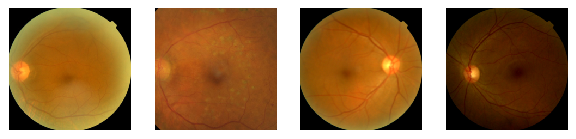

In [36]:
data_iter = iter(dataloader)
import numpy as np
images, labels = next(data_iter)
print(images.shape)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)